In [ ]:
!pip install fsspec==2025.3.2 --upgrade --quiet




In [ ]:
from transformers import SegformerForSemanticSegmentation, SegformerFeatureExtractor

# Load model and feature extractor
model = SegformerForSemanticSegmentation.from_pretrained(
    "nvidia/segformer-b0-finetuned-ade-512-512"
)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  

In [ ]:
!pip install transformers torchvision datasets --quiet


ERROR: Operation cancelled by user


In [ ]:
import torch
from torchvision import transforms
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader
from PIL import Image
import os
from transformers import SegformerForSemanticSegmentation, SegformerFeatureExtractor
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [ ]:
# Create directory
!mkdir -p data/coco

# Download validation images
!wget http://images.cocodataset.org/zips/val2017.zip -P data/coco
!unzip -q data/coco/val2017.zip -d data/coco

# Download annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P data/coco
!unzip -q data/coco/annotations_trainval2017.zip -d data/coco


--2025-04-20 12:32:18--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.85, 16.15.192.171, 52.216.145.227, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.85|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘data/coco/val2017.zip.1’

val2017.zip.1       100%[===================>] 777.80M   101MB/s    in 9.3s    

2025-04-20 12:32:27 (83.3 MB/s) - ‘data/coco/val2017.zip.1’ saved [815585330/815585330]

replace data/coco/val2017/000000212226.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: --2025-04-20 12:34:16--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.120, 16.182.105.65, 52.217.103.164, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2

In [ ]:
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

coco_val = CocoDetection(
    root='data/coco/val2017',
    annFile='data/coco/annotations/instances_val2017.json',
    transform=transform
)

val_loader = DataLoader(coco_val, batch_size=1, shuffle=False)


loading annotations into memory...
Done (t=1.12s)
creating index...
index created!


In [ ]:
import torchvision.models.segmentation as models

deeplab_model = models.deeplabv3_resnet50(pretrained=True).to(device)
deeplab_model.eval()


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
segformer_model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512").to(device)
segformer_model.eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `SegformerFeatureExtractor.__init__` and were ignored: 'feat

SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  

In [ ]:
def show_output(image, mask, title='Prediction'):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(transforms.ToPILImage()(image.cpu()))
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask.cpu().squeeze(), cmap='jet')
    plt.title(title)
    plt.axis('off')
    plt.show()


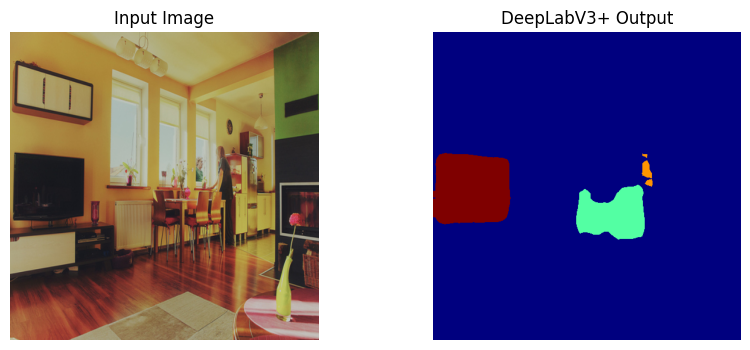

In [ ]:
for image, _ in val_loader:
    image = image.to(device)
    with torch.no_grad():
        output = deeplab_model(image)['out']
        pred_mask = torch.argmax(output.squeeze(), dim=0)
    show_output(image[0], pred_mask, title="DeepLabV3+ Output")
    break


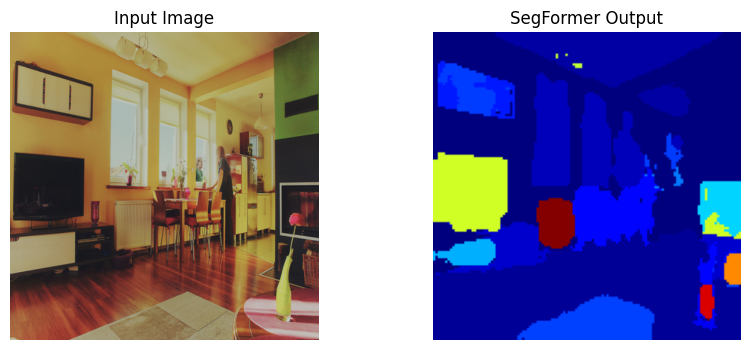

In [ ]:
img_path = "data/coco/val2017/000000000139.jpg"  # Pick any COCO val image
image = Image.open(img_path).convert("RGB")

# Preprocess
inputs = feature_extractor(images=image, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = segformer_model(**inputs)
    logits = outputs.logits
    pred_mask = torch.argmax(logits.squeeze(), dim=0)

# Resize original image to match model input
img_tensor = transforms.Resize((512, 512))(transforms.ToTensor()(image))

show_output(img_tensor, pred_mask, title="SegFormer Output")


In [ ]:
from torchvision.datasets import VOCSegmentation
from torchvision import transforms
from torch.utils.data import DataLoader

# Image and mask transforms
input_size = 256
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor()
])

target_transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.PILToTensor()
])

# Load Pascal VOC 2012 val set
val_dataset = VOCSegmentation(
    root="data/",
    year="2012",
    image_set="val",
    download=True,  # or False if already downloaded
    transform=transform,
    target_transform=target_transform
)

val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)



In [ ]:
def fast_hist(pred, label, num_classes):
    mask = (label >= 0) & (label < num_classes)
    hist = torch.bincount(
        num_classes * label[mask].to(torch.int64) + pred[mask],
        minlength=num_classes ** 2
    ).reshape(num_classes, num_classes).float()
    return hist


In [ ]:
def compute_miou(hist):
    intersection = torch.diag(hist)
    union = hist.sum(1) + hist.sum(0) - intersection
    iou = intersection / (union + 1e-10)
    miou = torch.mean(iou).item()
    return miou, iou.cpu().numpy()


In [ ]:
def evaluate_miou_voc(model, dataloader, num_classes=21, max_batches=100):
    model.eval()
    hist = torch.zeros((num_classes, num_classes)).to(device)

    with torch.no_grad():
        for i, (image, mask) in enumerate(dataloader):
            if i >= max_batches:
                break

            image = image.to(device)

            # Ensure image is [1, C, H, W]
            if image.ndim == 3:
                image = image.unsqueeze(0)

            # Handle mask shapes
            if mask.ndim == 4:
                mask = mask.squeeze(1)      # [B, 1, H, W] -> [B, H, W]
            if mask.ndim == 3 and mask.shape[0] == 1:
                mask = mask.squeeze(0)      # [1, H, W] -> [H, W]
            if mask.ndim == 3:
                mask = mask[0]              # Just in case it's [B, H, W]

            mask = mask.to(device).long()

            output = model(image)['out']         # [B, C, H, W]
            pred = torch.argmax(output.squeeze(), dim=0).cpu()

            hist += fast_hist(pred, mask.cpu(), num_classes)

    miou, class_ious = compute_miou(hist)
    return miou, class_ious


In [ ]:
miou, class_ious = evaluate_miou_voc(deeplab_model, val_loader)
print(f"✅ Mean IoU (DeepLabV3+ on Pascal VOC): {miou:.4f}")


✅ Mean IoU (DeepLabV3+ on Pascal VOC): 0.5280


In [ ]:
!pip install transformers datasets


In [ ]:
from datasets import load_dataset

# Load ADE20K dataset
dataset = load_dataset("scene_parse_150", split="validation")


In [ ]:
from torchvision import transforms

input_size = 256
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor()
])



In [ ]:
print(dataset[0])  # Print the first sample in the dataset


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=680x512 at 0x7ED8853C1210>, 'annotation': <PIL.PngImagePlugin.PngImageFile image mode=L size=680x512 at 0x7ED8856B6150>, 'scene_category': 135}


In [ ]:
def preprocess(sample):
    # Apply the same transform to the image
    image = transform(sample['image'])

    # Resize the annotation mask
    mask = transforms.Resize((input_size, input_size))(sample['annotation'])

    # Return the transformed image and mask
    return {'image': image, 'label': mask}


In [ ]:
from datasets import load_dataset

# Load validation split and take a manageable subset
raw_dataset = load_dataset("scene_parse_150", split="validation[:100]")  # 100 samples to start


In [ ]:
from torchvision import transforms

input_size = 256  # Use a smaller size for memory efficiency

transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor()
])

mask_transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.PILToTensor()
])


In [ ]:
from torch.utils.data import Dataset

class ADE20KDataset(Dataset):
    def __init__(self, hf_dataset, transform=None, target_transform=None):
        self.dataset = hf_dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = sample['image']
        mask = sample['annotation']

        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            mask = self.target_transform(mask).squeeze(0).long()  # Remove channel dim

        return image, mask


In [ ]:
from torch.utils.data import DataLoader

dataset = ADE20KDataset(
    hf_dataset=raw_dataset,
    transform=transform,
    target_transform=mask_transform
)

dataloader = DataLoader(dataset, batch_size=4, shuffle=False)


In [ ]:
import torch
import numpy as np

def fast_hist(pred, label, num_classes):
    mask = (label >= 0) & (label < num_classes)
    hist = torch.bincount(
        num_classes * label[mask] + pred[mask],
        minlength=num_classes**2
    ).reshape(num_classes, num_classes).float()
    return hist

def compute_miou(hist):
    intersection = torch.diag(hist)
    union = hist.sum(1) + hist.sum(0) - intersection
    iou = intersection / (union + 1e-10)
    miou = iou.mean().item()
    return miou, iou.cpu().numpy()


In [ ]:
import torch.nn.functional as F


In [ ]:
def evaluate_model(model, dataloader, num_classes=150, device='cpu'):
    model.to(device)
    model.eval()
    hist = torch.zeros((num_classes, num_classes)).to(device)

    with torch.no_grad():
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images).logits
            outputs = F.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)
            preds = torch.argmax(outputs, dim=1)


            for pred, mask in zip(preds, masks):
                hist += fast_hist(pred, mask, num_classes)

    miou, class_ious = compute_miou(hist)
    return miou, class_ious



In [ ]:
miou, class_ious = evaluate_model(model, dataloader)
print(f"✅ Mean IoU: {miou:.4f}")


✅ Mean IoU: 0.0013


In [ ]:
import torch
from transformers import SegformerForSemanticSegmentation

# Force CPU usage
device = torch.device("cpu")

# Load pretrained model to CPU
model = SegformerForSemanticSegmentation.from_pretrained(
    "nvidia/segformer-b0-finetuned-ade-512-512"
)
model.to(device)


SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  

In [ ]:
import matplotlib.pyplot as plt

def visualize_prediction(image, mask, pred, idx=0):
    """
    Displays original image, ground truth, and prediction side by side.
    `image`, `mask`, and `pred` are batched tensors.
    """
    image_np = image[idx].permute(1, 2, 0).cpu().numpy()
    mask_np = mask[idx].cpu().numpy()
    pred_np = pred[idx].cpu().numpy()

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(image_np)
    axes[0].set_title("Input Image")
    axes[1].imshow(mask_np, cmap='nipy_spectral')
    axes[1].set_title("Ground Truth")
    axes[2].imshow(pred_np, cmap='nipy_spectral')
    axes[2].set_title("Prediction")

    for ax in axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()


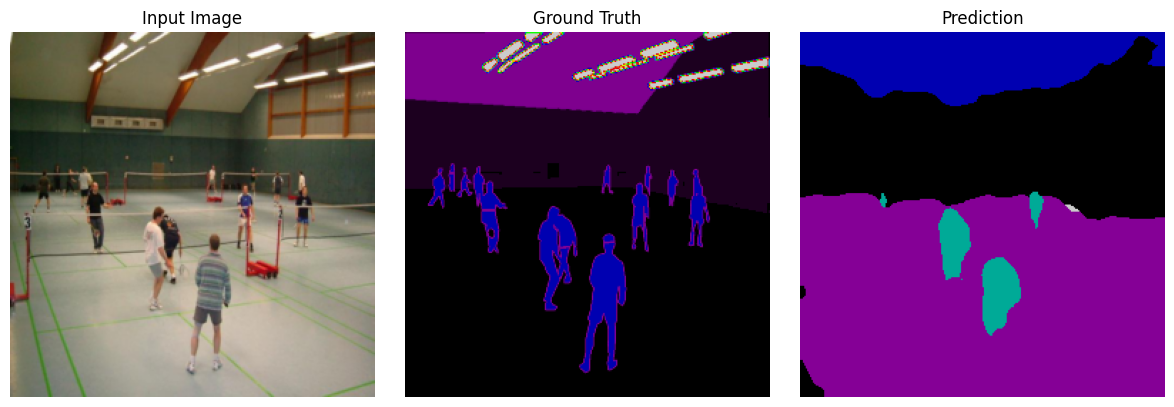

In [ ]:
# Get a single batch from the dataloader
images, masks = next(iter(dataloader))
images, masks = images.to(device), masks.to(device)

# Get predictions
with torch.no_grad():
    outputs = model(images).logits
    outputs = F.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)
    preds = torch.argmax(outputs, dim=1)

# Visualize the first image in the batch
visualize_prediction(images, masks, preds, idx=0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
